In [19]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = 80

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

reshaped_training_data = x_train.ravel().reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
reshaped_test_data = x_test.ravel().reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train shape:", reshaped_training_data.shape)
print(reshaped_training_data.shape[0], "train samples")
print(reshaped_test_data.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [3]:
pca = PCA(n_components=input_shape)
X_pca_train = pca.fit_transform(reshaped_training_data)
X_pca_test = pca.transform(reshaped_test_data)

## Build the model

In [4]:


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1620      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 2,250
Trainable params: 2,250
Non-trainable params: 0
_________________________________________________________________


## Train the model

Epoch 1/15
469/469 [==============================] - 2s 2ms/step - loss: 0.9477 - accuracy: 0.7142
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.3003 - accuracy: 0.9126
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2352 - accuracy: 0.9314
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9402
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1842 - accuracy: 0.9457
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1707 - accuracy: 0.9497
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.1603 - accuracy: 0.9526
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9552
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.1463 - accuracy: 0.9562: 2s - loss: 0.1322  - ETA: 1s -
Epoch 10/15
469/469 [==============================] - 1s 2ms/step -

In [34]:
X_pca_test.round(2)

array([[-1.3 ,  2.93, -0.17, ...,  0.37,  0.33, -0.  ],
       [ 0.08, -3.75, -0.6 , ...,  0.13, -0.07,  0.14],
       [-3.71, -1.69,  0.26, ...,  0.36, -0.02,  0.1 ],
       ...,
       [-1.06,  2.34,  1.39, ...,  0.01, -0.01,  0.48],
       [-1.23, -0.43,  2.52, ..., -0.21,  0.03, -0.15],
       [ 4.09, -0.35,  2.77, ..., -0.28,  0.58,  0.  ]], dtype=float32)

## Evaluate the trained model

0
0.6878600001335144


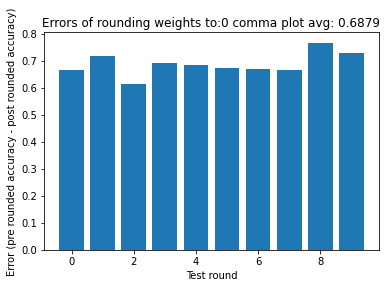

1
0.009650003910064698


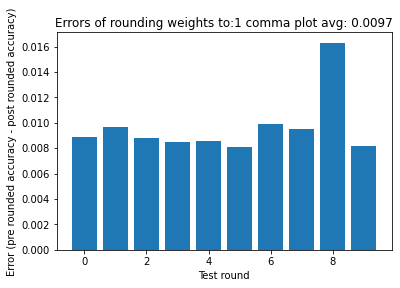

2
4.000663757324219e-05


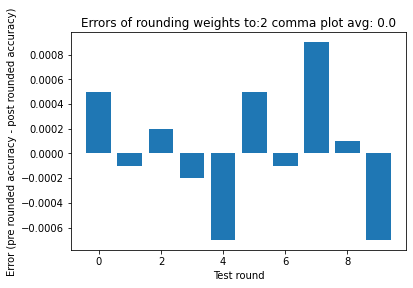

3
-3.998875617980957e-05


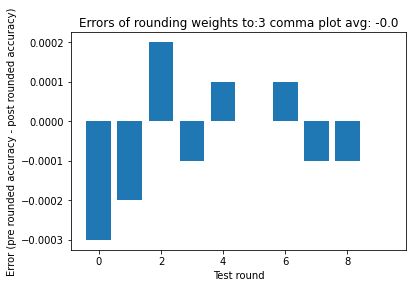

In [44]:
batch_size = 128
epochs = 15

roundings = [0,1,2,3]
rounding_input_data = 0
bars = 10
for rounding in roundings:
    diff = []
    print(rounding)
    for rounds in range(bars):
        model = keras.Sequential([
            keras.Input(shape=input_shape),
            layers.Dense(20, activation="relu"),
            layers.Dense(20, activation="relu"),
            layers.Dense(num_classes, activation="softmax"),
        ])
        model.compile(loss="categorical_crossentropy", 
                      optimizer="adam", 
                      metrics=["accuracy"])
        model.fit(X_pca_train, 
                  y_train, 
                  batch_size=batch_size, 
                  epochs=epochs,
                  verbose=0)
        oldWeights = model.get_weights()
        pre_rounded_results = model.evaluate(X_pca_test.round(rounding_input_data), 
                                             y_test, 
                                             verbose=0)
        weights = []
        for layer in model.get_weights():
            weights.append(layer.round(rounding))
        model.set_weights(weights)
        
        post_rounded_results = model.evaluate(X_pca_test.round(rounding_input_data), 
                                              y_test, 
                                              verbose=0)
        diff.append(pre_rounded_results[1]-post_rounded_results[1])
    print(np.mean(diff))
    plt.bar(x=range(0,bars,1), height=diff)
    plt.xlabel("Test round")
    plt.ylabel("Error (pre rounded accuracy - post rounded accuracy)")
    plt.title("Errors of rounding weights to:{} comma plot avg: {}".format(rounding, round(np.mean(diff),4)))
    plt.show()

-0.0002962157130241394

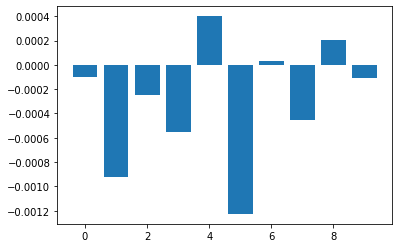

In [36]:
print(np.mean(diff))
plt.bar(x=range(0,bars,1), height=diff)